## Plotting of cross-section graphs

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotting

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import CROSS-SECTION (cs) ASV
cs_asv = pd.read_csv('../data/output/nuorgam_cs_1_asv.csv', delimiter=',')

In [4]:
# import CROSS-SECTION (cs) ALS
cs_als = pd.read_csv('../data/output/nuorgam_cs_1_als.csv', delimiter=',')

In [5]:
# import CROSS-SECTION (cs) S2
cs_s2 = pd.read_csv('../data/output/nuorgam_cs_1_s2.csv', delimiter=',')

In [6]:
# check
cs_asv

,ASV_m,ASV
0,0.000000,11.535834
1,0.290602,11.544347
2,0.581204,11.537449
3,0.871805,11.542030
4,1.162407,11.572466
...,...,...
404,117.403127,11.457525
405,117.693729,11.411921
406,117.984330,11.365954
407,118.274932,11.344849


In [7]:
# check
cs_als

,ALS_m,ALS
0,0.000000,11.339711
1,0.290602,11.178363
2,0.581204,11.365653
3,0.871805,11.275093
4,1.162407,11.055611
...,...,...
404,117.403127,10.863645
405,117.693729,10.785810
406,117.984330,10.732349
407,118.274932,10.685247


In [8]:
# check
cs_s2

,S2_m,S2
0,0.000000,11.355293
1,1.171039,11.660054
2,2.342078,11.660054
3,3.513117,11.660054
4,4.684156,11.660054
...,...,...
98,114.761815,11.355293
99,115.932854,11.190214
100,117.103893,11.228310
101,118.274932,11.228310


In [9]:
# rename S2 to SDB
cs_s2 = cs_s2.rename(columns={"S2": "SDB"})

In [10]:
# replace "None" to nan
cs_asv = cs_asv.replace('None', np.nan)
cs_als = cs_als.replace('None', np.nan)
cs_s2 = cs_s2.replace('None', np.nan)

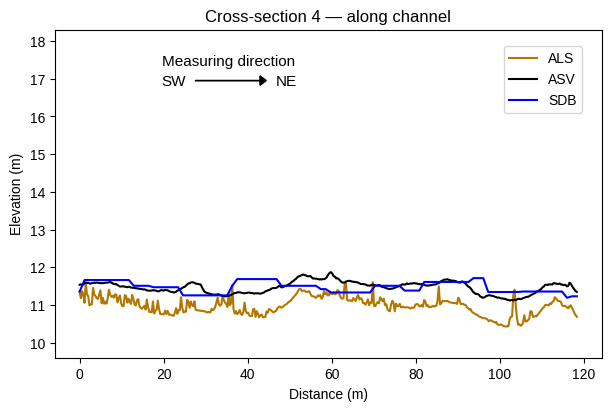

In [14]:
# plot
fig, ax = plotting.init_plot(figsize=(6,4))
ax.set_title('Cross-section 4 — along channel')

cs_als.plot(x='ALS_m', color = '#B37700', linestyle="solid", ax=ax)
cs_asv.plot(x='ASV_m', color='black',  linestyle="solid", ax=ax)
cs_s2.plot(x='S2_m', color = '#0000FF', linestyle="solid", ax=ax)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
#ax.axis('equal')
ax.set_ylim(9.6,18.3)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.977, 0.971))
fig.text(0.26, 0.85, 'Measuring direction', fontsize=11)
fig.text(0.26, 0.80, 'SW', fontsize=11) # start point of the compass 
fig.text(0.45, 0.80, 'NE', fontsize=11) # end point of the compass
ax.arrow(27.5, 16.95, 16.9, 0, 
         length_includes_head=True, head_width=0.25, head_length=1.5, 
         color='black'
        )

In [15]:
# save as png
plotting.save_plot(fig=fig, name='nuorgam_cs_4_v3', dpi=600)